<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Apriori_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Display first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 3. Preprocess Data with Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

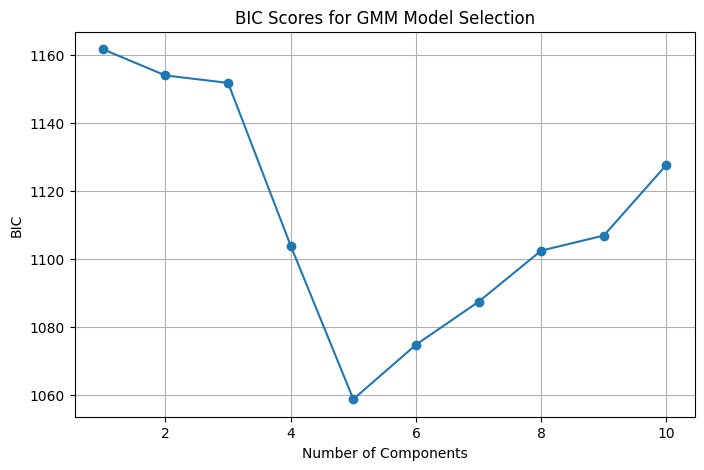

In [4]:
n_components = np.arange(1, 11)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(8, 5))
plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC Scores for GMM Model Selection')
plt.grid(True)
plt.show()

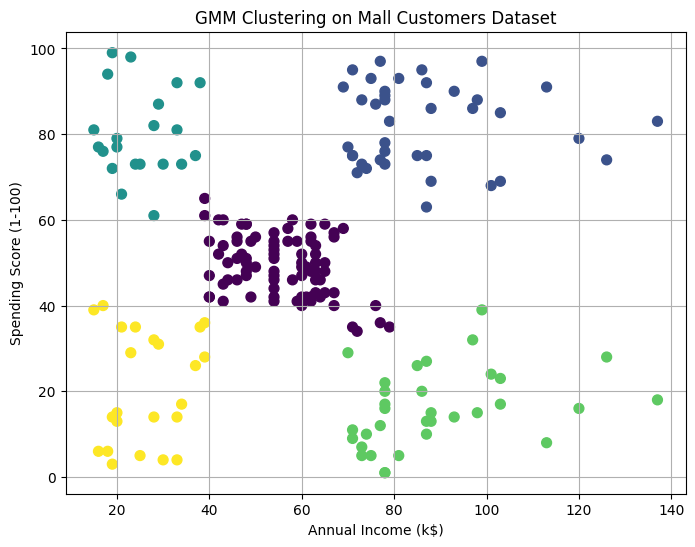

In [5]:
optimal_clusters = 5
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering on Mall Customers Dataset')
plt.grid(True)
plt.show()

In [4]:
# Step 1: Import dependencies
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Load dataset
df = pd.read_csv("/content/carprices.csv")

# Step 3: Normalize and rename columns
df.columns = df.columns.str.strip().str.lower()

# Rename for easier reference
df = df.rename(columns={
    'sell price($)': 'price',
    'age(yrs)': 'age'
})

# Step 4: Check for required columns
required_columns = ['price', 'mileage', 'age']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Step 5: Bin numeric columns into Low/Medium/High using quantiles
labels = ['Low', 'Medium', 'High']
df_binned = pd.DataFrame()
df_binned['Price'] = pd.qcut(df['price'], q=3, labels=[f'Price_{l}' for l in labels])
df_binned['Mileage'] = pd.qcut(df['mileage'], q=3, labels=[f'Mileage_{l}' for l in labels])
df_binned['Age'] = pd.qcut(df['age'], q=3, labels=[f'Age_{l}' for l in labels])

# Step 6: Convert rows into itemsets (transactions)
transactions = df_binned.apply(lambda row: row.tolist(), axis=1).tolist()

# Step 7: One-hot encode the itemsets
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Step 8: Run Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Step 9: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 10: Show top rules sorted by lift
print("\nTop Association Rules (sorted by lift):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))



Top Association Rules (sorted by lift):
                  antecedents                consequents   support  \
0              (Mileage_High)                 (Age_High)  0.230769   
1                  (Age_High)             (Mileage_High)  0.230769   
22  (Mileage_High, Price_Low)                 (Age_High)  0.230769   
23      (Age_High, Price_Low)             (Mileage_High)  0.230769   
27                 (Age_High)  (Mileage_High, Price_Low)  0.230769   
26             (Mileage_High)      (Age_High, Price_Low)  0.230769   
39             (Price_Medium)  (Mileage_Medium, Age_Low)  0.153846   
34  (Mileage_Medium, Age_Low)             (Price_Medium)  0.153846   
38           (Mileage_Medium)    (Age_Low, Price_Medium)  0.153846   
29      (Price_High, Age_Low)              (Mileage_Low)  0.307692   

    confidence      lift  
0     0.750000  3.250000  
1     1.000000  3.250000  
22    0.750000  3.250000  
23    1.000000  3.250000  
27    1.000000  3.250000  
26    0.750000  3.250000  